In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook 

from inktime import palette_plot, primaries, optical_density, transmission   
import imageio
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
cd /home/gus/Documents/PhD/PhD_Projects/Part3_MFT_Application/3.4_MFT-external/3.4.9_Inktime_Frank/Data/Processed/RS

/home/gus/Documents/PhD/PhD_Projects/Part3_MFT_Application/3.4_MFT-external/3.4.9_Inktime_Frank/Data/Processed/RS


In [36]:
files = glob('*BW1*')

df = pd.read_csv(files[1], header = [0,1])

In [33]:
len(df)

0

In [34]:
df

Empty DataFrame
Columns: [(date, value), (Id, value), (status, value), (cum_hrs, value), (cum_klux_hr, value), (cum_MJ/m2, value), (L*, mean), (L*, std), (a*, mean), (a*, std), (b*, mean), (b*, std), (C*, mean), (C*, std), (h, mean), (h, std), (dE76, mean), (dE76, std), (dE00, mean), (dE00, std), (dR_VIS, mean), (dR_VIS, std)]
Index: []

[0 rows x 22 columns]

In [4]:
cd /home/gus/Documents/PhD/PhD_Projects/Part3_MFT_Application/3.4_MFT-external/3.4.9_Inktime_Frank/Data/Interim/Photos

/home/gus/Documents/PhD/PhD_Projects/Part3_MFT_Application/3.4_MFT-external/3.4.9_Inktime_Frank/Data/Interim/Photos


<IPython.core.display.Javascript object>


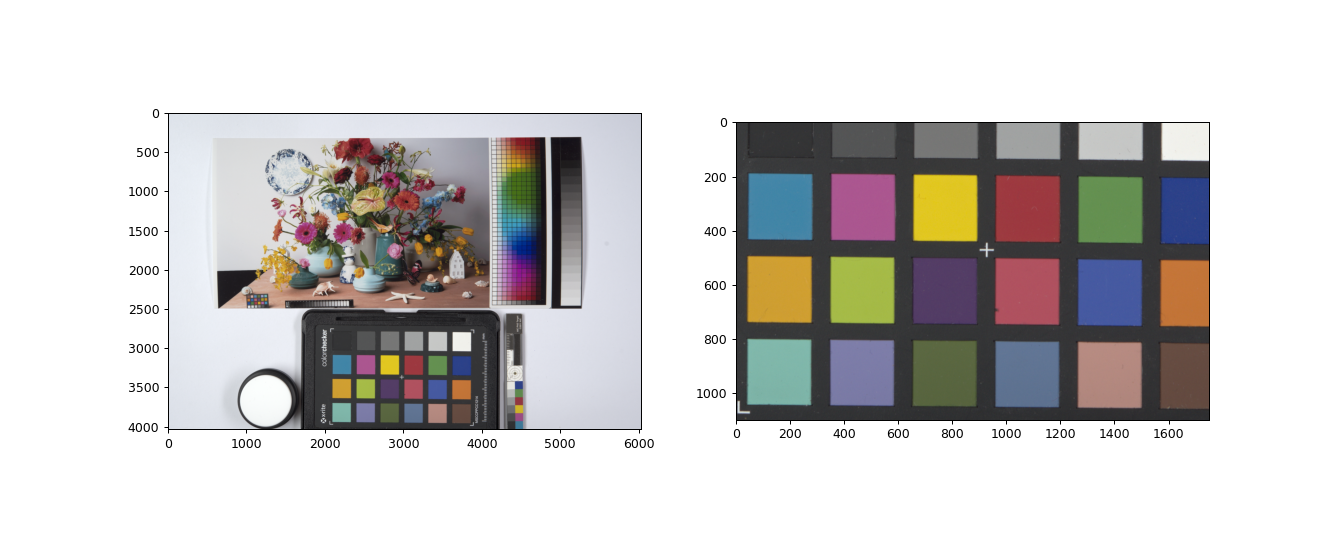

In [32]:
im_file = '20220127_0029.tif'
im = imageio.imread(im_file)
im_crop = im[2900:4000,2050:3800]

im_crop = im_crop / 255

fig, [ax1,ax2] = plt.subplots(1,2, figsize = (15,6))

ax1.imshow(im)
ax2.imshow(im_crop)
plt.show()

In [20]:
im.shape

(4032, 6032, 3)

In [16]:
palette_plot??

/home/gus/Documents/PhD/External_projects/inktime/inktime/transparent.py:204: RuntimeWarning: divide by zero encountered in log
  od_img = -np.log(rgb_img)
/home/gus/Documents/PhD/External_projects/inktime/inktime/transparent.py:224: RuntimeWarning: invalid value encountered in true_divide
  od_b_norm[is_ink] = od_b[is_ink] / norm[is_ink]


<IPython.core.display.Javascript object>


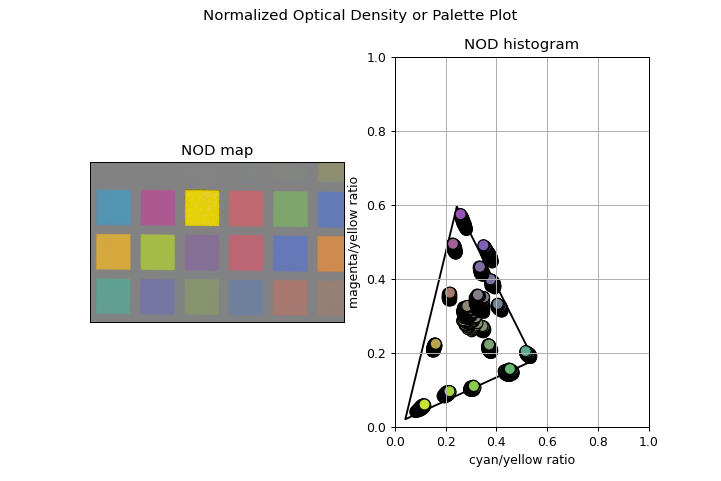

(<Figure size 900x600 with 2 Axes>,
 [<AxesSubplot:title={'center':'NOD map'}>,
  <AxesSubplot:title={'center':'NOD histogram'}, xlabel='cyan/yellow ratio', ylabel='magenta/yellow ratio'>])

In [30]:
palette_plot(im_crop)

In [33]:
M = primaries(im_crop)
M

/home/gus/Documents/PhD/External_projects/inktime/inktime/transparent.py:204: RuntimeWarning: divide by zero encountered in log
  od_img = -np.log(rgb_img)
/home/gus/Documents/PhD/External_projects/inktime/inktime/transparent.py:224: RuntimeWarning: invalid value encountered in true_divide
  od_b_norm[is_ink] = od_b[is_ink] / norm[is_ink]


array([[0.59575478, 0.24408836, 0.16015686],
       [0.18079228, 0.54729394, 0.27191377],
       [0.02118044, 0.04111201, 0.93770755]])

In [36]:
M_inv = np.linalg.inv(M)
M_inv

array([[ 1.94249881, -0.86015183, -0.08234698],
       [-0.6336865 ,  2.14845944, -0.51477294],
       [-0.01609336, -0.07476647,  1.09085983]])

In [39]:
od_img = optical_density(im_crop, normalize=False)

# temporarily flatten image into list 
img_shape = od_img.shape
od_list = od_img.reshape(-1, 3)

# matrix multiplication 
conc_list = od_list @ M_inv

# unflatten list into image 
concs_img = conc_list.reshape(img_shape)

# seperate images for cyan, magenta and yellow 
cyan_conc_img, magenta_conc_img, yellow_conc_img = concs_img.transpose(2, 0, 1)

<IPython.core.display.Javascript object>


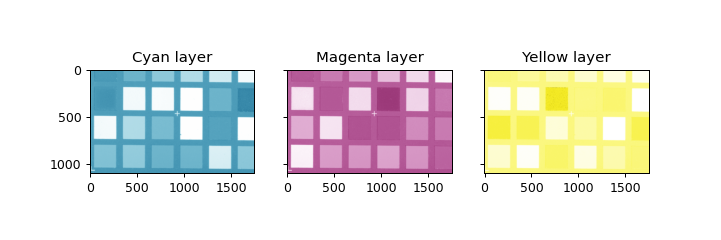

In [40]:
T_cyan = transmission(cyan_conc_img, M[0])
T_cyan = np.clip(T_cyan, a_min=0, a_max=1)

T_magenta = transmission(magenta_conc_img, M[1])
T_magenta = np.clip(T_magenta, a_min=0, a_max=1) 

T_yellow = transmission(yellow_conc_img, M[2])
T_yellow = np.clip(T_yellow, a_min=0, a_max=1)

fig, [ax0, ax1, ax2] = plt.subplots(ncols=3, figsize=[9, 3], sharex=True, sharey=True)

ax0.imshow(T_cyan)
ax0.set_title(f'Cyan layer')
ax1.imshow(T_magenta)
ax1.set_title('Magenta layer')
ax2.imshow(T_yellow);
ax2.set_title('Yellow layer');

<IPython.core.display.Javascript object>


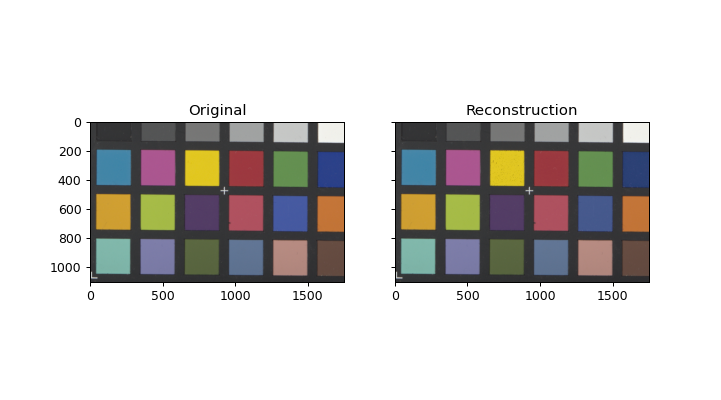

In [41]:
cyan_x_magenta_x_yellow = T_cyan * T_magenta * T_yellow 

fig, [ax0, ax1] = plt.subplots(ncols=2, figsize=[9, 5], sharex=True, sharey=True)

ax0.imshow(im_crop)
ax1.imshow(cyan_x_magenta_x_yellow)

ax0.set_title('Original')
ax1.set_title('Reconstruction');

In [16]:
import pandas as pd
import math
from math import *

In [8]:
cd /home/gus/Documents/PhD/PhD_Projects/Part3_MFT_Application/3.4_MFT-external/3.4.9_Chromogenic_Frank/Data/Processed/MFT

/home/gus/Documents/PhD/PhD_Projects/Part3_MFT_Application/3.4_MFT-external/3.4.9_Chromogenic_Frank/Data/Processed/MFT


In [39]:
file = glob('*SP*')[0]

df = pd.read_csv(file, index_col='wavelength_nm')
R = df.iloc[:,0]
T = 100-R
A = -np.log10(R/100)
wl = df.index
df

,00:00:00.000,00:00:21.495,00:00:41.784,00:01:01.707,00:01:21.632,00:01:41.558,00:02:01.442,00:02:21.730,00:02:41.624,00:03:01.495,...,00:56:41.503,00:57:01.771,00:57:21.631,00:57:41.499,00:58:01.765,00:58:21.624,00:58:41.498,00:59:01.773,00:59:21.638,00:59:41.50
wavelength_nm,,,,,,,,,,,,,,,,,,,,,
305,53.52,53.50,51.81,52.46,54.76,51.85,49.39,49.56,49.27,52.11,...,50.13,49.21,51.16,49.93,55.49,50.50,53.84,54.99,53.90,54.13
306,51.37,52.70,51.47,52.22,53.65,50.82,49.01,48.57,48.81,51.16,...,49.35,49.08,49.83,48.74,54.44,48.71,53.00,54.13,53.10,53.58
307,49.65,52.09,51.09,52.11,52.80,49.89,48.81,47.78,48.46,50.49,...,48.74,49.04,48.73,47.79,53.55,47.29,52.22,53.37,52.52,53.16
308,50.59,52.69,50.51,52.88,53.52,49.60,49.68,48.25,48.84,51.51,...,49.16,49.62,49.07,48.30,53.73,48.17,51.75,53.27,53.24,53.51
309,51.54,53.29,49.93,53.64,54.24,49.32,50.55,48.72,49.22,52.53,...,49.58,50.21,49.41,48.80,53.92,49.05,51.28,53.17,53.97,53.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,8.22,7.98,8.04,8.05,8.00,7.97,7.99,8.06,8.07,8.02,...,8.16,8.14,7.98,8.07,8.14,8.04,8.23,8.15,8.17,8.20
1137,8.23,8.01,8.07,8.05,8.01,7.98,8.00,8.08,8.10,8.07,...,8.15,8.16,8.02,8.10,8.14,8.04,8.21,8.16,8.19,8.20
1138,8.23,8.05,8.10,8.05,8.01,8.00,8.01,8.09,8.12,8.12,...,8.15,8.18,8.07,8.12,8.14,8.04,8.19,8.18,8.20,8.19


<IPython.core.display.Javascript object>


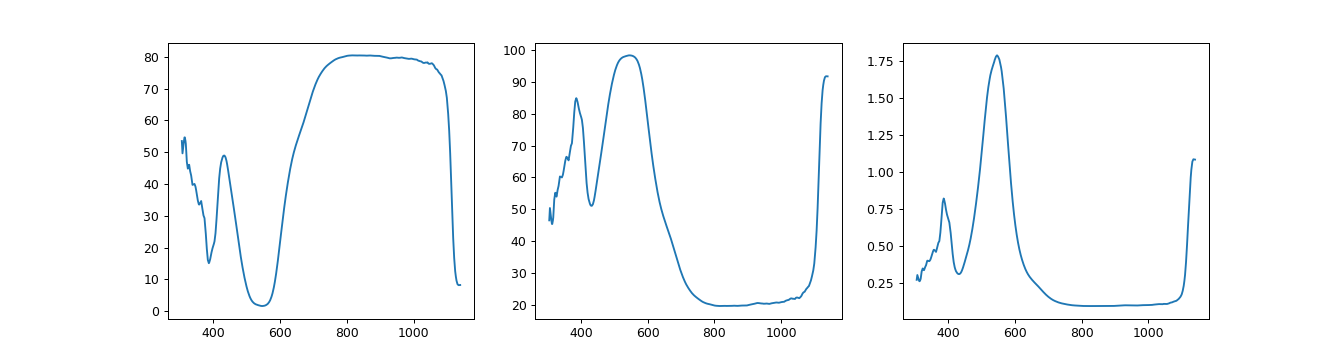

In [40]:
fig, [ax0,ax1,ax2] = plt.subplots(1,3,figsize = (15,4))

ax0.plot(wl,R)
ax1.plot(wl,T)
ax2.plot(wl,A)